In [1]:
#DBSCAN Clustering
'''
Perform Clustering(Hierarchical,Kmeans & DBSCAN)for the crime data and identify the number of clusters formed and draw inferences.

'''

'\nPerform Clustering(Hierarchical,Kmeans & DBSCAN)for the crime data and identify the number of clusters formed and draw inferences.\n\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
#Import Dataset

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 84A1-6D3A

 Directory of C:\Users\hp\Documents\EXCELR\DS_Assign_Ans

07/28/2023  07:04 PM    <DIR>          .
07/28/2023  12:05 PM    <DIR>          ..
07/28/2023  06:36 PM    <DIR>          .ipynb_checkpoints
07/26/2023  05:55 PM           783,051 50_startups data-MLR.ipynb
07/26/2023  12:10 PM             2,438 50_Startups.csv
07/28/2023  06:31 PM            81,417 Airlines_DBSCAN.ipynb
07/28/2023  06:29 PM           159,225 Airlines_Hierarchical_clustering.ipynb
07/28/2023  06:33 PM           146,345 Airlines_Kmeans.ipynb
07/26/2023  06:03 PM         4,610,348 bank-full.csv
04/26/2023  08:47 AM    <DIR>          Basic_Stats_L1
04/26/2023  08:57 AM    <DIR>          Basic_Stats_L2
04/15/2023  10:24 PM    <DIR>          Clustering
07/26/2023  05:55 PM         2,508,902 Corolla-MLR.ipynb
07/28/2023  04:49 PM             1,328 crime_data.csv
07/28/2023  07:04 PM           195,546 Crime_DBSCAN.ipynb
07/28/2023  07:04 PM           

In [5]:
data=pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
#Missing Data

In [8]:
data.isnull()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [9]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [10]:
data[data.duplicated()] 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [11]:
#Renaming columns
data1=data.rename({'Unnamed: 0':'State'},axis=1)
data1.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


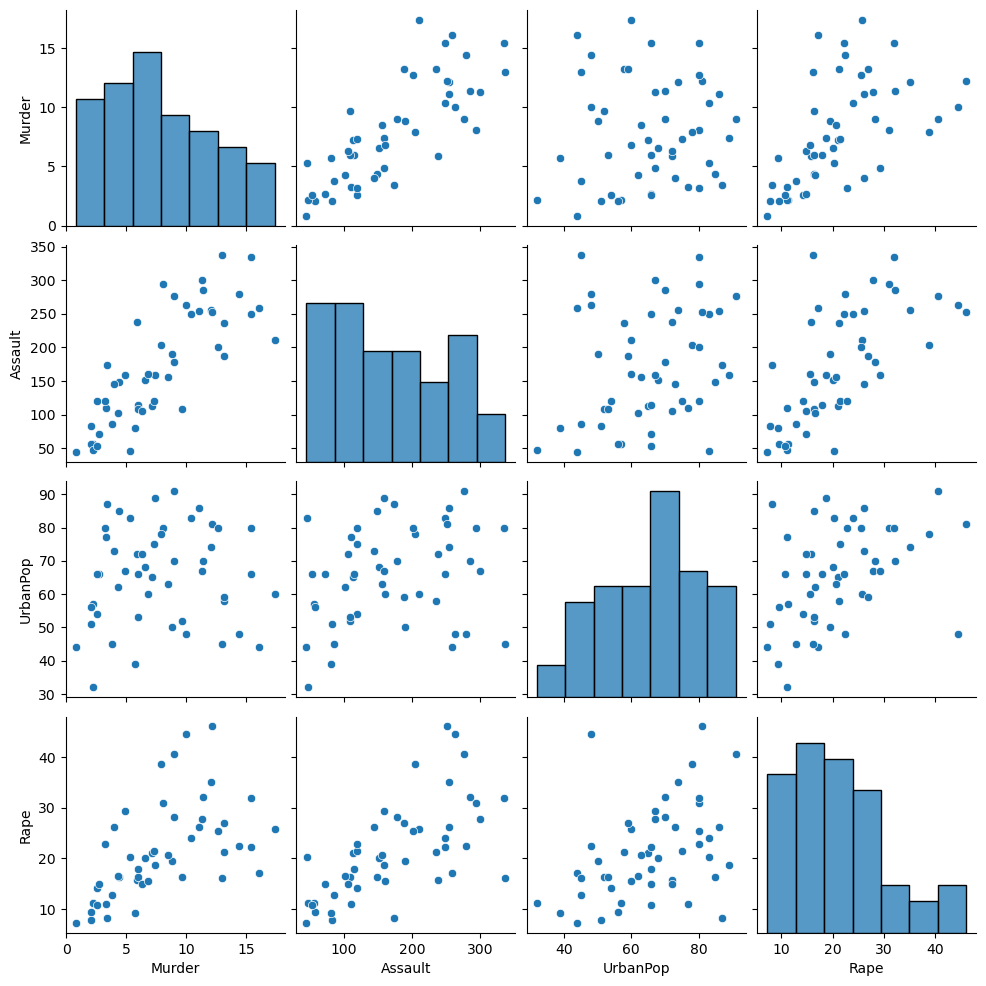

In [12]:
sns.pairplot(data1)
plt.show()

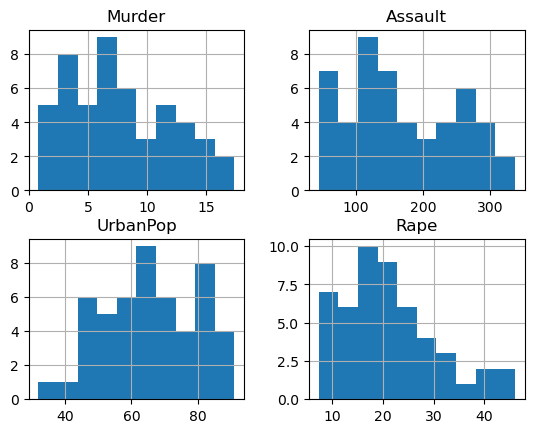

In [13]:
data1.hist()
plt.show()

In [14]:
data1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [15]:
data1.drop(['State'],axis=1,inplace=True)

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [17]:
array=data1.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [18]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [19]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [20]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [21]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [22]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [23]:
c1

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [25]:
data2=pd.concat([data1,c1],axis=1)
data2.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


In [26]:
data2.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,8.009524,178.904762,65.380952,21.7500
1,0,6.625000,128.000000,66.375000,18.5125


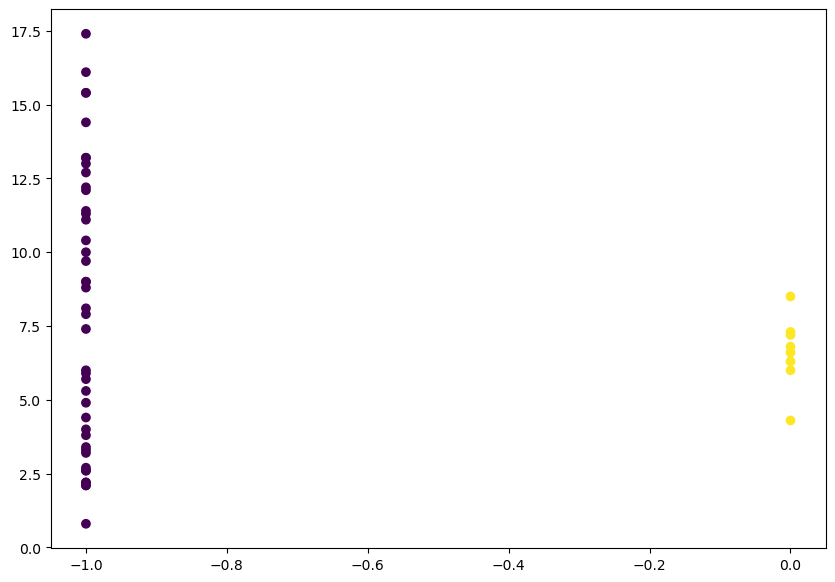

In [27]:
plt.figure(figsize=(10, 7))  
plt.scatter(data2['cluster'],data2['Murder'], c=dbscan.labels_) 
plt.show()